In [1]:
s = poly(0, "S")

 s  = 
  S


In [2]:
Tkr = 12.8
Kkr = 1.18
Ti = Tkr / 2
Td = Ti / 4
Tc = Td / 8
T0 = 1.17
n = 6
w1 = (1 + 1 / (Ti*s) + Td * s / (1 + Tc * s)) * (Kkr * 0.6) * (2/(1 + T0 * s)^n)
w = w1 / (1 + w1)

 Tkr  = 
   12.8
 Kkr  = 
   1.18
 Ti  = 
   6.4
 Td  = 
   1.6
 Tc  = 
   0.2
 T0  = 
   1.17
 n  = 
   6.
 w1  = 
                                     1.416 +9.3456S +16.31232S^2                                    
   -----------------------------------------------------------------------------------------------  
   6.4S +46.208S^2 +140.4S^3 +231.28934S^4 +220.89446S^5 +120.16864S^6 +33.255052S^7 +3.2834102S^8  
 w  = 
                                         0.4312602 +2.8463167S +4.968103S^2                                        
   --------------------------------------------------------------------------------------------------------------  
   0.4312601 +4.7955161S +19.041311S^2 +42.760494S^3 +70.441889S^4 +67.275978S^5 +36.598744S^6 +10.128207S^7 +S^8  


In [3]:
a = w.den
b = w.num
Sl = syslin('c', b, a)

 a  = 
  0.4312601 +4.7955161S +19.041311S^2 +42.760494S^3 +70.441889S^4 +67.275978S^5 +36.598744S^6 +10.128207S^7 +S^8
 b  = 
  0.4312602 +2.8463167S +4.968103S^2
 Sl  = 
                                         0.4312602 +2.8463167s +4.968103s^2                                        
   --------------------------------------------------------------------------------------------------------------  
   0.4312601 +4.7955161s +19.041311s^2 +42.760494s^3 +70.441889s^4 +67.275978s^5 +36.598744s^6 +10.128207s^7 +s^8  


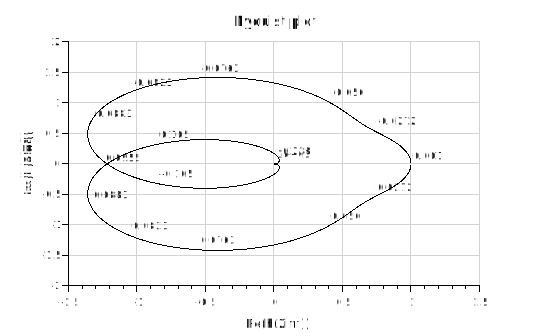

In [4]:
nyquist(Sl)

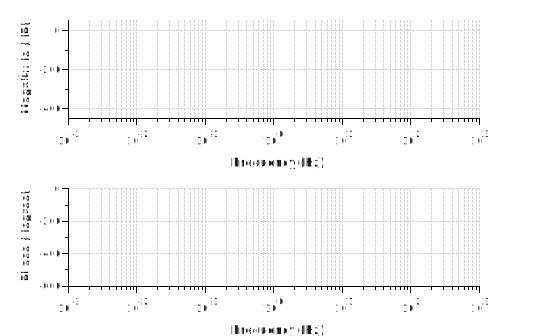

In [5]:
bode(Sl)

In [6]:
numer = coeff(w.num)
denom = coeff(w.den)
denom = denom(1:length(denom) - 1);
numer = [numer zeros(1, length(denom) - length(numer))]

 numer  = 
   0.4312602   2.8463167   4.968103
 denom  = 
   0.4312601   4.7955161   19.041311   42.760494   70.441889   67.275978   36.598744   10.128207   1.
 numer  = 
   0.4312602   2.8463167   4.968103   0.   0.   0.   0.   0.


In [7]:
A = [zeros(1, length(denom) - 1); eye(length(denom) - 1, length(denom) - 1)];
A = [A -denom']

 A  = 
   0.   0.   0.   0.   0.   0.   0.  -0.4312601
   1.   0.   0.   0.   0.   0.   0.  -4.7955161
   0.   1.   0.   0.   0.   0.   0.  -19.041311
   0.   0.   1.   0.   0.   0.   0.  -42.760494
   0.   0.   0.   1.   0.   0.   0.  -70.441889
   0.   0.   0.   0.   1.   0.   0.  -67.275978
   0.   0.   0.   0.   0.   1.   0.  -36.598744
   0.   0.   0.   0.   0.   0.   1.  -10.128207


In [8]:
I = eye(A);
H = lyap(A, -I, 'c')

 H  = 
   5205.756   -0.5        -330.19835   0.5         68.412913  -0.5        -21.212111   0.5      
  -0.5         330.19835  -0.5        -68.412913   0.5         21.212111  -0.5        -9.167697 
  -330.19835  -0.5         68.412913  -0.5        -21.212111   0.5         9.167697   -0.5      
   0.5        -68.412913  -0.5         21.212111  -0.5        -9.167697    0.5         6.3710435
   68.412913   0.5        -21.212111  -0.5         9.167697   -0.5        -6.3710435   0.5      
  -0.5         21.212111   0.5        -9.167697   -0.5         6.3710435  -0.5        -9.3413036
  -21.212111  -0.5         9.167697    0.5        -6.3710435  -0.5         9.3413036  -0.5      
   0.5        -9.167697   -0.5         6.3710435   0.5        -9.3413036  -0.5         38.789064


In [9]:
spec(H)
spec(A)

 ans  =
   0.0521468
   1.2623009
   7.4528718
   9.2524368
   41.256391
   55.493152
   346.56633
   5227.9128
 ans  =
  -0.1165012 + 0.5355118i
  -0.1165012 - 0.5355118i
  -0.1775046 + 0.i       
  -0.328804  + 0.i       
  -1.1875895 + 1.0148489i
  -1.1875895 - 1.0148489i
  -2.018092  + 0.i       
  -4.9956248 + 0.i       


In [10]:
min(spec(H))
max(spec(H))

 ans  =
   0.0521468
 ans  =
   5227.9128


In [11]:
norm(H, 2)

 ans  =
   5227.9128
